In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Lily', 'Tom'],
    'Age': [25, 30, 35, 40, 50, 60],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'ShangHai', 'BeiJing'],
    'Sex': [True, False, True, False, True, False],
    'Score': [100, 101, 102, 103, 104, 105],
}
df = pd.DataFrame(data)

In [3]:
## 添加列
## 方法1:
# df['Hobby'] = ['movie', 'coffee', 'book', 'ball', 'hike', 'sleep']
#
# ## 方法2 位置、列名、列值
# df.insert(0, 'Hobby_bak', df['Hobby'])

## 删除某个列
# 方法1:
# del(df['Age'])

# 方法2: -- 这个会返回删除列的内容
# dd = df.pop('City')
# print(df)

# 方法3
# df.drop(columns=['Score'], inplace=True)
# print(df)

## 访问列
# df['Age']
# df[['Age', 'City']]
# df[:]['Name']
# df.loc[:, 'Age']
# # df.loc[:, 1] ##error, index已经更改
# df.iloc[:, 2] ## 指定iloc下标访问方式
# df.loc[:, 'Age':'Sex']


In [4]:
### 添加行
## 方法1:这个是新增的 下标+1
# df.loc[len(df.index)] = ['hbj', 30, 'ShenZhen', True, 108, 'work']
## 方法2: 这个是新增的 test,不管之前是什么下标
# df.loc['test'] = ['hbj', 30, 'ShenZhen', True, 108]
## 方法3--ignore_index=True,会删除原来的索引,重新设置默认索引
##     --ignore_index=False,则原样拼接,保留原来索引,即使索引重复
# df2 = pd.concat([df, df], ignore_index=True)
# df2 = pd.concat([df, df], ignore_index=True)


### 行访问
# df[1] ## error 1个参数,会被解析为按列访问
# df.loc[1]
# df[3:5]
# df.loc[1:3, 'Age']
# df.iloc[2:6, 2:5]

### 设置索引后的 列访问
# df.index = ['a', 'b', 'c', 'd', 'e', 'f']
# df.loc[1] ##error 已经重置索引列
# df.loc['a']
# df.loc[['a', 'b']]
# df.iloc[:3]

### 行删除
## 删除指定的索引行
# df.drop(index=0, inplace=True)
## 删除指定的索引值
# df.index = ['a', 'b', 'c', 'd', 'e', 'f']
# df.drop('a')


In [5]:
### 修改数据
df
## 这种方法高版本不可用了
##df['Name'][1] = 'Bobb'
## 替换成下面的方法--修改只有这种方法
df.loc[1, 'Name'] = 'BobF'
df.iloc[0, 1] = 33
df
## 这种都是只读
# df.loc()[1]['Score']

,Name,Age,City,Sex,Score
0,Alice,33,New York,True,100
1,BobF,30,Los Angeles,False,101
2,Charlie,35,Chicago,True,102
3,David,40,Houston,False,103
4,Lily,50,ShangHai,True,104
5,Tom,60,BeiJing,False,105


In [6]:
### 常用属性
df.axes ## (行列索引)

[RangeIndex(start=0, stop=6, step=1),
 Index(['Name', 'Age', 'City', 'Sex', 'Score'], dtype='object')]

In [7]:
df.dtypes

Name     object
Age       int64
City     object
Sex        bool
Score     int64
dtype: object

In [8]:
df.empty

False

In [9]:
df.ndim

2

In [10]:
df.size, len(df)

(30, 6)

In [11]:
df.values, type(df.values) ## 剔除索引

(array([['Alice', 33, 'New York', True, 100],
        ['BobF', 30, 'Los Angeles', False, 101],
        ['Charlie', 35, 'Chicago', True, 102],
        ['David', 40, 'Houston', False, 103],
        ['Lily', 50, 'ShangHai', True, 104],
        ['Tom', 60, 'BeiJing', False, 105]], dtype=object),
 numpy.ndarray)

In [12]:
df.head(3)

,Name,Age,City,Sex,Score
0,Alice,33,New York,True,100
1,BobF,30,Los Angeles,False,101
2,Charlie,35,Chicago,True,102


In [13]:
df.tail(5)

,Name,Age,City,Sex,Score
1,BobF,30,Los Angeles,False,101
2,Charlie,35,Chicago,True,102
3,David,40,Houston,False,103
4,Lily,50,ShangHai,True,104
5,Tom,60,BeiJing,False,105


In [14]:
### 统计属性
np.max(df['Score'])
np.min(df['Score'])
np.median(df['Score'])
np.mean(df['Score'])
np.std(df['Score'])
np.var(df['Score']) ##方差
np.cov(df['Score']) ##协方差
df['Score'].median()
df.info()
df.describe()
df.describe(include=['object', 'number'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Age     6 non-null      int64 
 2   City    6 non-null      object
 3   Sex     6 non-null      bool  
 4   Score   6 non-null      int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 330.0+ bytes


,Name,Age,City,Score
count,6,6.000000,6,6.000000
unique,6,NaN,6,NaN
top,Alice,NaN,New York,NaN
freq,1,NaN,1,NaN
mean,NaN,41.333333,NaN,102.500000
std,NaN,11.518102,NaN,1.870829
min,NaN,30.000000,NaN,100.000000
25%,NaN,33.500000,NaN,101.250000
50%,NaN,37.500000,NaN,102.500000
75%,NaN,47.500000,NaN,103.750000


In [15]:
df.sum(axis='index', numeric_only=True)
df.sum(axis='columns', numeric_only=True)
df.sum(axis='rows', numeric_only=True)
df.sum(axis=0, numeric_only=True)
df.sum(axis=1, numeric_only=True)

0    134
1    131
2    138
3    143
4    155
5    165
dtype: object

In [16]:
df.cumsum(axis=0)

,Name,Age,City,Sex,Score
0,Alice,33,New York,1,100
1,AliceBobF,63,New YorkLos Angeles,1,201
2,AliceBobFCharlie,98,New YorkLos AngelesChicago,2,303
3,AliceBobFCharlieDavid,138,New YorkLos AngelesChicagoHouston,2,406
4,AliceBobFCharlieDavidLily,188,New YorkLos AngelesChicagoHoustonShangHai,3,510
5,AliceBobFCharlieDavidLilyTom,248,New YorkLos AngelesChicagoHoustonShangHaiBeiJing,3,615


In [17]:
### 排序
## 按指定列排序
df.sort_values(by=['Score'], ascending=False)
## 先按age排序,后按score排序
df.sort_values(by=['Age', 'Score'], ascending=[True, False])

,Name,Age,City,Sex,Score
1,BobF,30,Los Angeles,False,101
0,Alice,33,New York,True,100
2,Charlie,35,Chicago,True,102
3,David,40,Houston,False,103
4,Lily,50,ShangHai,True,104
5,Tom,60,BeiJing,False,105


In [18]:
## 按索引排序
## 按索引列方向排序(索引值)
# df.sort_index(ascending=False)
## 按索引行方向排序(索引值)
df.sort_index(ascending=False, axis=1)

,Sex,Score,Name,City,Age
0,True,100,Alice,New York,33
1,False,101,BobF,Los Angeles,30
2,True,102,Charlie,Chicago,35
3,False,103,David,Houston,40
4,True,104,Lily,ShangHai,50
5,False,105,Tom,BeiJing,60


In [19]:
### 分组
## 可以查看图片images里的介绍
## https://zhuanlan.zhihu.com/p/101284491 --group
## https://zhuanlan.zhihu.com/p/100064394 --map apply applymap
## https://zhuanlan.zhihu.com/p/102274476 --merge
## 分组后->聚合、转换、过滤

company=["A","B","C"]
data=pd.DataFrame({
    "company":[company[x] for x in np.random.randint(0,len(company),10)],
    "salary":np.random.randint(5,50,10),
    "age":np.random.randint(15,50,10)
})
groupObj = data.groupby('company')
### groupBy后 需要转成list才能看懂存储的内容
print(list(groupObj),
      groupObj.groups,
      groupObj.indices,
      sep='\n')

print('*'*50)

## 遍历每个分组
for keys, group in groupObj:
    print(keys)
    print(group)

print('#'*50)
## 获取某个分组
b_group = groupObj.get_group('B')
print(b_group, type(b_group))

print("%"*50)
## 获取分组后的某个列进行聚合
age_series = groupObj['age']
print(list(age_series))


[('A',   company  salary  age
2       A      15   48
9       A      36   44), ('B',   company  salary  age
0       B      28   26
1       B      44   25
3       B      32   21), ('C',   company  salary  age
4       C      28   31
5       C       5   31
6       C      25   46
7       C      29   44
8       C      15   26)]
{'A': [2, 9], 'B': [0, 1, 3], 'C': [4, 5, 6, 7, 8]}
{'A': array([2, 9]), 'B': array([0, 1, 3]), 'C': array([4, 5, 6, 7, 8])}
**************************************************
A
  company  salary  age
2       A      15   48
9       A      36   44
B
  company  salary  age
0       B      28   26
1       B      44   25
3       B      32   21
C
  company  salary  age
4       C      28   31
5       C       5   31
6       C      25   46
7       C      29   44
8       C      15   26
##################################################
  company  salary  age
0       B      28   26
1       B      44   25
3       B      32   21 <class 'pandas.core.frame.DataFrame'>
%%%%%%%%%%%%%%

In [20]:
## 分组后聚合操作
data.groupby('company').sum()
data.groupby('company').count()
data.groupby('company').mean()
data.groupby('company').median()
data.groupby('company').max()
## 这种方式也是可以,这种方法的好处是可以一次求多个,且可以自定义函数
data.groupby('company').agg('mean')
res = data.groupby('company').agg(['count', 'mean', 'median', 'std'])
print(res)

        salary                                age                       
         count       mean median        std count  mean median       std
company                                                                 
A            2  25.500000   25.5  14.849242     2  46.0   46.0  2.828427
B            3  34.666667   32.0   8.326664     3  24.0   25.0  2.645751
C            5  20.400000   25.0  10.237187     5  35.6   31.0  8.848729


In [21]:
## 自定义函数
def sumFunc(x):
    v = np.sum(x)
    return v

def maxFunc(x):
    v = np.max(x)
    return v

## 这种只能自由组合
data.groupby('company')['salary'].agg([sumFunc, maxFunc])
data.groupby('company')['age'].agg([maxFunc, sumFunc])
data.groupby('company')[['salary', 'age']].agg([maxFunc, sumFunc])

## 更牛逼的方法 -- 字典映射
data.groupby('company').agg({
    'salary': ['mean', maxFunc],
    'age': ['std', sumFunc],
})


data.groupby('company', as_index=False).agg({
    'salary': ['mean', maxFunc],
    'age': ['std', sumFunc],
})

company     salary               age        
                mean maxFunc       std sumFunc
0       A  25.500000      36  2.828427      92
1       B  34.666667      44  2.645751      72
2       C  20.400000      29  8.848729     178

In [22]:
### merge
user = pd.DataFrame({
    'userid': ['a', 'b', 'c', 'd'],
    'age': [23, 46, 32, 19]
})

consumer = pd.DataFrame({
    'userid': ['a', 'c'],
    'payment': [2000, 3500]
})

In [23]:
user.merge(consumer, on='userid', how='inner')

,userid,age,payment
0,a,23,2000
1,c,32,3500


In [24]:
consumer2 = pd.DataFrame({
    'userid': ['a', 'c', 'a', 'b'],
    'payment': [2000, 3500, 500, 1000]
})
user.merge(consumer2, on='userid', how='inner')

,userid,age,payment
0,a,23,2000
1,a,23,500
2,b,46,1000
3,c,32,3500


In [25]:
consumer3 = pd.DataFrame({
    'userid': ['a', 'c', 'e'],
    'payment': [2000, 3500, 6000],
})

user.merge(consumer3, on='userid', how='left')

,userid,age,payment
0,a,23,2000.0
1,b,46,NaN
2,c,32,3500.0
3,d,19,NaN


In [26]:
user.merge(consumer3, on='userid', how='right')

,userid,age,payment
0,a,23.0,2000
1,c,32.0,3500
2,e,NaN,6000


In [27]:
user.merge(consumer3, on='userid', how='outer')

,userid,age,payment
0,a,23.0,2000.0
1,b,46.0,NaN
2,c,32.0,3500.0
3,d,19.0,NaN
4,e,NaN,6000.0


In [28]:
### 透视表(类似create view)和交叉表

In [29]:
df = pd.read_csv('../assets/James_Harden.csv')
# df.head(100)
# df.info(), df.describe()
df

,对手,胜负,主客场,命中,投篮数,投篮命中率,3分命中率,篮板,助攻,得分
0,勇士,胜,客,10,23,0.435,0.444,6,11,27
1,国王,胜,客,8,21,0.381,0.286,3,9,27
2,小牛,胜,主,10,19,0.526,0.462,3,7,29
3,灰熊,负,主,8,20,0.400,0.250,5,8,22
4,76人,胜,客,10,20,0.500,0.250,3,13,27
5,黄蜂,胜,客,8,18,0.444,0.400,10,11,27
6,灰熊,负,客,6,19,0.316,0.222,4,8,20
7,76人,负,主,8,21,0.381,0.429,4,7,29
8,尼克斯,胜,客,9,23,0.391,0.353,5,9,31
9,老鹰,胜,客,8,15,0.533,0.545,3,11,29


In [30]:
# 查看哈登对阵每个队伍的得分
df1 = df.drop(columns=['胜负', '主客场'], axis=0)
ds = pd.pivot_table(df1, index=[u'对手']) ##默认求mean,均值
# type(ds), ds.index, ds.values
ds

,3分命中率,助攻,命中,得分,投篮命中率,投篮数,篮板
对手,,,,,,,
76人,0.33950,10.00,9.0,28.00,0.4405,20.5,3.5
勇士,0.44400,11.00,10.0,27.00,0.4350,23.0,6.0
国王,0.28600,9.00,8.0,27.00,0.3810,21.0,3.0
太阳,0.54500,7.00,12.0,48.00,0.5450,22.0,2.0
小牛,0.46200,7.00,10.0,29.00,0.5260,19.0,3.0
尼克斯,0.36900,9.50,10.5,34.00,0.4175,25.0,3.5
开拓者,0.57100,3.00,16.0,48.00,0.5520,29.0,8.0
掘金,0.14300,9.00,6.0,21.00,0.3750,16.0,8.0
步行者,0.29150,12.50,8.5,27.50,0.3965,21.5,6.5


In [31]:
#对阵同一对手在不同主客场下的数据
df2 = df.drop(columns=['胜负'], axis=0)
pd.pivot_table(df2, index=['对手', '主客场'])

3分命中率    助攻    命中    得分  投篮命中率   投篮数    篮板
对手  主客场                                             
76人 主    0.4290   7.0   8.0  29.0  0.381  21.0   4.0
    客    0.2500  13.0  10.0  27.0  0.500  20.0   3.0
勇士  客    0.4440  11.0  10.0  27.0  0.435  23.0   6.0
国王  客    0.2860   9.0   8.0  27.0  0.381  21.0   3.0
太阳  客    0.5450   7.0  12.0  48.0  0.545  22.0   2.0
小牛  主    0.4620   7.0  10.0  29.0  0.526  19.0   3.0
尼克斯 主    0.3850  10.0  12.0  37.0  0.444  27.0   2.0
    客    0.3530   9.0   9.0  31.0  0.391  23.0   5.0
开拓者 客    0.5710   3.0  16.0  48.0  0.552  29.0   8.0
掘金  主    0.1430   9.0   6.0  21.0  0.375  16.0   8.0
步行者 主    0.3330  10.0   8.0  29.0  0.364  22.0   8.0
    客    0.2500  15.0   9.0  26.0  0.429  21.0   5.0
湖人  客    0.4440   9.0  13.0  36.0  0.591  22.0   4.0
灰熊  主    0.3395   8.0   9.5  30.0  0.420  22.5   4.5
    客    0.3610   7.5   7.5  24.5  0.383  19.5   4.5
爵士  主    0.8750  13.0  19.0  56.0  0.760  25.0   2.0
    客    0.3330   3.0   8.0  29.0  0.421  19.0   5.0
猛龙  主    0.2730  11.0   8.0  38.0  0.320  25.0   6.0
篮网  主    0.6150   8.0  13.0  37.0  0.650  20.0  10.0
老鹰  客    0.5450  11.0   8.0  29.0  0.533  15.0   3.0
骑士  主    0.4290  13.0   8.0  35.0  0.381  21.0  11.0
鹈鹕  主    0.4000  17.0   8.0  26.0  0.500  16.0   1.0
黄蜂  客    0.4000  11.0   8.0  27.0  0.444  18.0  10.0

In [32]:
pd.pivot_table(df2, index=['主客场', '对手'])

3分命中率    助攻    命中    得分  投篮命中率   投篮数    篮板
主客场 对手                                              
主   76人  0.4290   7.0   8.0  29.0  0.381  21.0   4.0
    小牛   0.4620   7.0  10.0  29.0  0.526  19.0   3.0
    尼克斯  0.3850  10.0  12.0  37.0  0.444  27.0   2.0
    掘金   0.1430   9.0   6.0  21.0  0.375  16.0   8.0
    步行者  0.3330  10.0   8.0  29.0  0.364  22.0   8.0
    灰熊   0.3395   8.0   9.5  30.0  0.420  22.5   4.5
    爵士   0.8750  13.0  19.0  56.0  0.760  25.0   2.0
    猛龙   0.2730  11.0   8.0  38.0  0.320  25.0   6.0
    篮网   0.6150   8.0  13.0  37.0  0.650  20.0  10.0
    骑士   0.4290  13.0   8.0  35.0  0.381  21.0  11.0
    鹈鹕   0.4000  17.0   8.0  26.0  0.500  16.0   1.0
客   76人  0.2500  13.0  10.0  27.0  0.500  20.0   3.0
    勇士   0.4440  11.0  10.0  27.0  0.435  23.0   6.0
    国王   0.2860   9.0   8.0  27.0  0.381  21.0   3.0
    太阳   0.5450   7.0  12.0  48.0  0.545  22.0   2.0
    尼克斯  0.3530   9.0   9.0  31.0  0.391  23.0   5.0
    开拓者  0.5710   3.0  16.0  48.0  0.552  29.0   8.0
    步行者  0.2500  15.0   9.0  26.0  0.429  21.0   5.0
    湖人   0.4440   9.0  13.0  36.0  0.591  22.0   4.0
    灰熊   0.3610   7.5   7.5  24.5  0.383  19.5   4.5
    爵士   0.3330   3.0   8.0  29.0  0.421  19.0   5.0
    老鹰   0.5450  11.0   8.0  29.0  0.533  15.0   3.0
    黄蜂   0.4000  11.0   8.0  27.0  0.444  18.0  10.0

In [33]:
df3 = df.drop(columns=['对手'], axis=0)
pd.pivot_table(df3, index=['主客场','胜负'], values=['得分', '助攻', '篮板'])

助攻         得分        篮板
主客场 胜负                                
主   胜   10.555556  34.222222  5.444444
    负    8.666667  29.666667  5.000000
客   胜    9.000000  32.000000  4.916667
    负    8.000000  20.000000  4.000000

In [34]:
pd.pivot_table(df3, index=['主客场','胜负'], values=['得分', '助攻', '篮板'],
               aggfunc=['mean', 'sum']
               )

mean                       sum         
               助攻         得分        篮板   助攻   得分  篮板
主客场 胜负                                              
主   胜   10.555556  34.222222  5.444444   95  308  49
    负    8.666667  29.666667  5.000000   26   89  15
客   胜    9.000000  32.000000  4.916667  108  384  59
    负    8.000000  20.000000  4.000000    8   20   4

In [35]:
df4 = df.drop(columns=['胜负'], axis=0)
res = pd.pivot_table(df4, index=['主客场'], columns=['对手'], values=['得分'],
               aggfunc=['sum'], fill_value=0, margins=True
               )
print(res)
res

    sum                                                                       \
     得分                                                                        
对手  76人  勇士  国王  太阳  小牛 尼克斯 开拓者  掘金 步行者  湖人   灰熊  爵士  猛龙  篮网  老鹰  骑士  鹈鹕  黄蜂   
主客场                                                                            
主    29   0   0   0  29  37   0  21  29   0   60  56  38  37   0  35  26   0   
客    27  27  27  48   0  31  48   0  26  36   49  29   0   0  29   0   0  27   
All  56  27  27  48  29  68  48  21  55  36  109  85  38  37  29  35  26  27   

          
          
对手   All  
主客场       
主    397  
客    404  
All  801  


sum                                                                       \
     得分                                                                        
对手  76人  勇士  国王  太阳  小牛 尼克斯 开拓者  掘金 步行者  湖人   灰熊  爵士  猛龙  篮网  老鹰  骑士  鹈鹕  黄蜂   
主客场                                                                            
主    29   0   0   0  29  37   0  21  29   0   60  56  38  37   0  35  26   0   
客    27  27  27  48   0  31  48   0  26  36   49  29   0   0  29   0   0  27   
All  56  27  27  48  29  68  48  21  55  36  109  85  38  37  29  35  26  27   

          
          
对手   All  
主客场       
主    397  
客    404  
All  801

In [36]:
# df4 = df.drop(columns=['胜负'], axis=0)
res = pd.pivot_table(df, index=['对手', '胜负'], columns=['主客场'], values=['得分'],
               aggfunc=['sum'], fill_value=0, margins=True
               )
res

sum          
         得分          
主客场       主    客  All
对手  胜负               
76人 胜     0   27   27
    负    29    0   29
勇士  胜     0   27   27
国王  胜     0   27   27
太阳  胜     0   48   48
小牛  胜    29    0   29
尼克斯 胜    37   31   68
开拓者 胜     0   48   48
掘金  胜    21    0   21
步行者 胜    29   26   55
湖人  胜     0   36   36
灰熊  胜    38   29   67
    负    22   20   42
爵士  胜    56   29   85
猛龙  负    38    0   38
篮网  胜    37    0   37
老鹰  胜     0   29   29
骑士  胜    35    0   35
鹈鹕  胜    26    0   26
黄蜂  胜     0   27   27
All     397  404  801

In [37]:
### pivot_table
## index 相当于 分组条件,可以有多个 (必须有)
## columns 相当于要分别统计的类别 [可选]
## values 要统计的值 [可选, 默认所有列, 所以当有的列不是数值类型时,报错]
## aggfunc 统计方法 [可选, 默认mean]
## fill_value 为空的填充值
## margins 汇总
##
## 所以为了更好得做pivot_table,一般都是一步一步添加条件,先做好index分组,然后查看结果,在逐步添加columns等参数

## 完全等价
## pd.pivot_table(df,index=[字段1],values=[字段2],aggfunc=[函数],fill_value=0)
## df.groupby([字段1])[字段2].agg(函数).fillna(0)

## 但pivot_table中存在非数值列时,且被用到了values,会报错
## 可以用Table['求和项'] = pd.to_numeric(Table['求和项'],errors='coerce') 屏蔽掉

![pivot](../images/v2-36c652c87857f536377e4ecc25544d68_1440w.png)

In [38]:
#统计哈登不同主客场与胜负下的场数以及投篮命中率（哈登在主场且胜利的场数以及在这种情况下的投篮命中率）
res = pd.pivot_table(df, index=['主客场'], columns=['胜负'], values=['投篮命中率'], aggfunc={
    '投篮命中率': 'mean',
    '胜负': 'count'
})
res

投篮命中率         胜负   
胜负          胜      负   胜  负
主客场                        
主    0.493333  0.367   9  3
客    0.472667  0.316  12  1

In [46]:
res.loc['主']['胜负', '胜'], res.loc['主']['投篮命中率', '胜']

(np.float64(9.0), np.float64(0.4933333333333334))

In [316]:
### 交叉表
# 交叉表是用于统计分组频率的特殊透视表
pd.crosstab(df['主客场'], df['胜负'])

胜负,胜,负
主客场,,
主,9,3
客,12,1


与透视图的区别

pd.crosstab 专注于频次统计，默认计算的是出现次数，不需要指定聚合函数。

pd.pivot_table 更灵活，可以计算数值列的统计指标（例如均值、总数等），但需要指定 values 和 aggfunc。

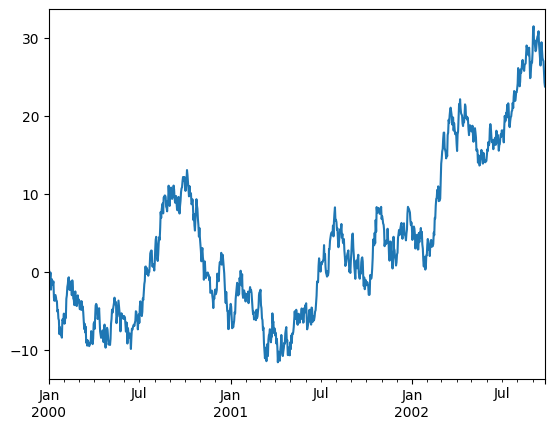

In [321]:
### 绘图
### https://pandas.pydata.org/docs/user_guide/visualization.html
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
plt.figure()
ts = ts.cumsum()
ts.plot()
plt.show()

<Figure size 640x480 with 0 Axes>

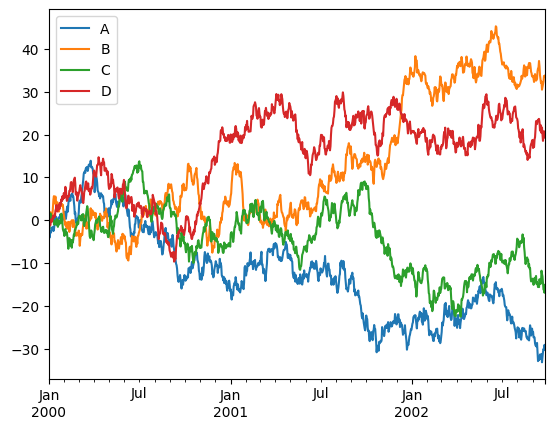

In [322]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
plt.figure()
df.plot();

          B         C
0 -1.943778  0.948110
1 -2.336278  0.385743
2 -1.295356  0.010990
3 -1.456305 -0.270791
4 -0.517514  1.069424


<Figure size 640x480 with 0 Axes>

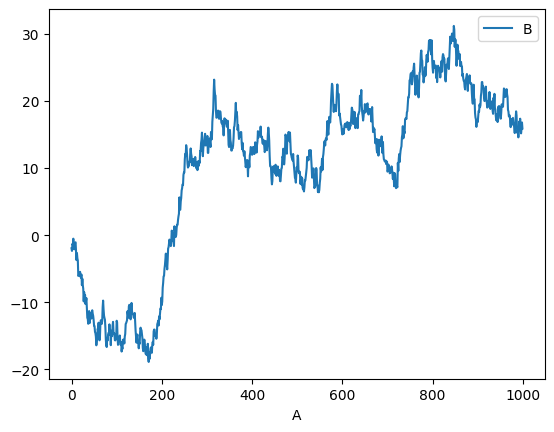

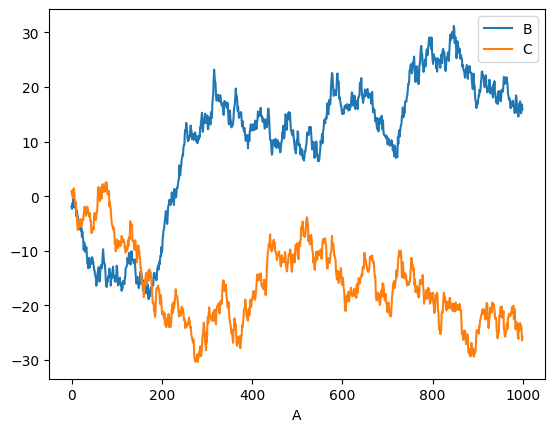

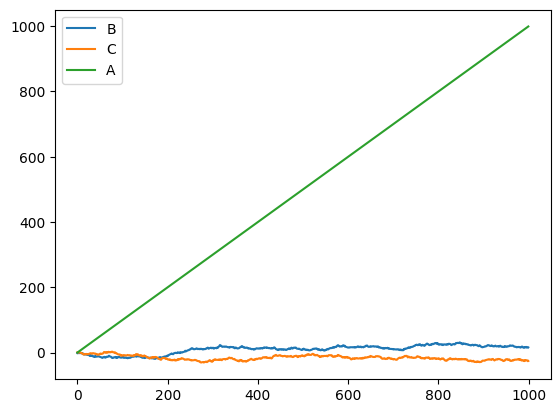

In [329]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()
print(df3.head())
df3["A"] = pd.Series(list(range(len(df3))))
plt.figure()
df3.plot(x="A", y="B") ## 指定x轴
df3.plot(x="A", y=["B", "C"]) ## 指定x轴,且多个y轴
df3.plot() ## 不指定x轴,则默认采用索引,所有列都是y轴
plt.show()

<Figure size 640x480 with 0 Axes>

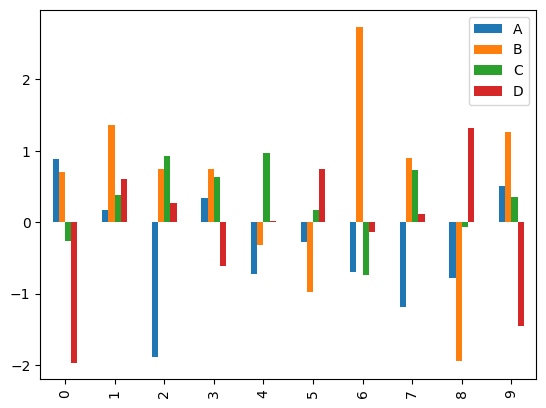

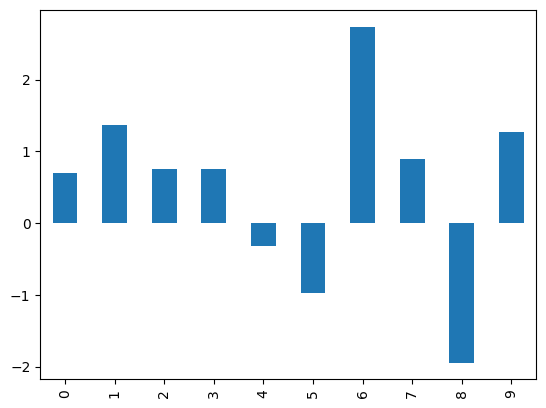

<Figure size 640x480 with 0 Axes>

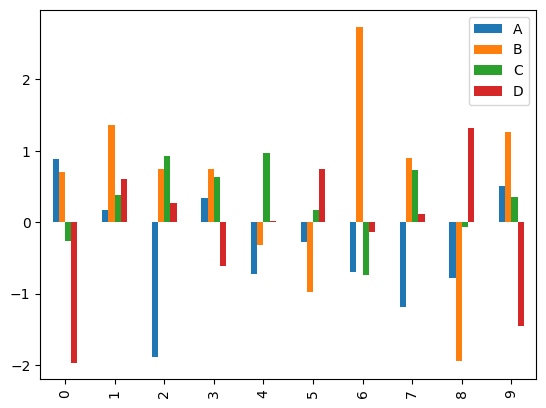

<Figure size 640x480 with 0 Axes>

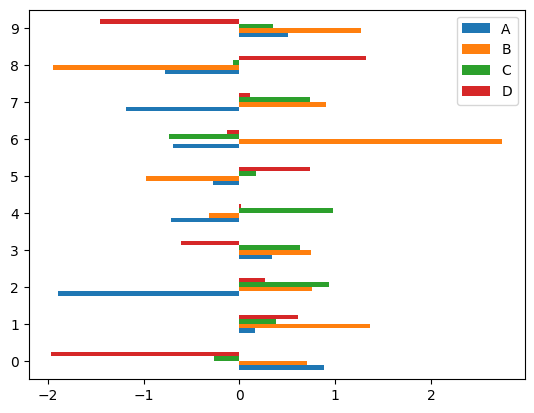

<Figure size 640x480 with 0 Axes>

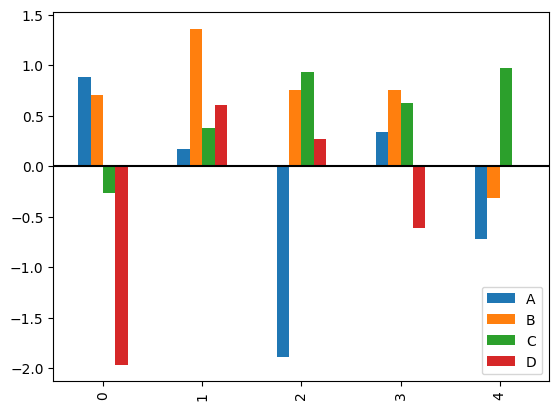

<Figure size 640x480 with 0 Axes>

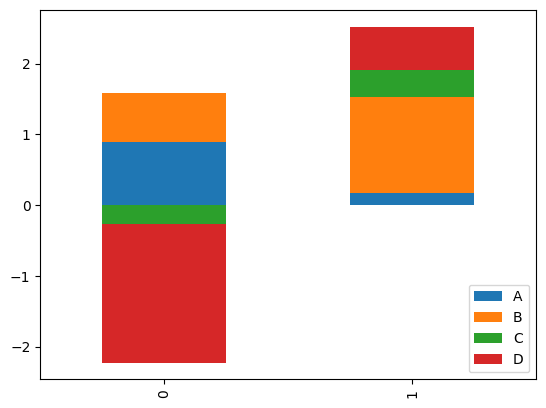

In [347]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
plt.figure()
df.plot.bar()
plt.show()

plt.figure()
df["B"].plot(kind="bar")
plt.show()

plt.figure()
df.plot(kind="bar")
plt.show()

plt.figure()
df.plot.barh()
plt.show()

plt.figure()
df.iloc[:5].plot.bar()
plt.axhline(0, color="k")
plt.show()

plt.figure()
df.iloc[:2].plot.bar(stacked=True)
plt.show()


<Figure size 640x480 with 0 Axes>

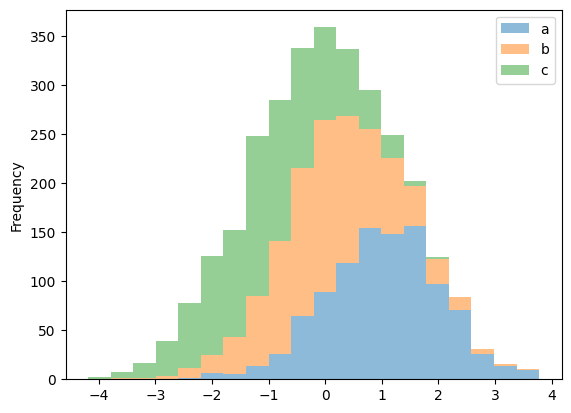

In [350]:
### 直方图

df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)


plt.figure();
df4.plot.hist(alpha=0.5, stacked=True, bins=20);
plt.show()

,A,B,C,D,E
0,0.843019,0.863451,0.046339,0.750832,0.913297
1,0.168570,0.891652,0.238688,0.387830,0.842560
2,0.197980,0.875846,0.926529,0.618635,0.598227
3,0.040142,0.326753,0.614852,0.378691,0.399674
4,0.167689,0.380181,0.670452,0.098127,0.616284
5,0.512511,0.933677,0.445245,0.142684,0.205042
6,0.402548,0.162343,0.382635,0.198559,0.311762
7,0.444268,0.636852,0.454542,0.040371,0.356257
8,0.549188,0.530744,0.245306,0.749530,0.063655
9,0.945901,0.094360,0.528996,0.336814,0.321528


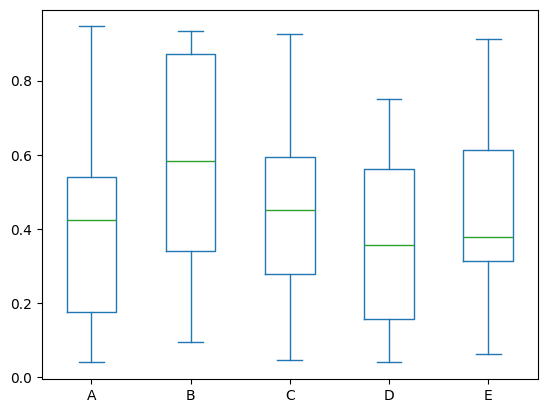

In [352]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box();
df